In [1]:
from sympy import symbols

x = symbols('x')

```1/(1+25*x**2)```

In [2]:
# 求めたい関数
def f(xi):
    return 1/(1+25*xi**2)
#     return float(expr.subs(x, xi))

In [15]:
# 点と, 対応する関数値, Lagrange Term
from numpy import linspace
xs = list(linspace(-3,3,10))
ys = list(map(f,xs))

N = len(xs)

# Lagrange Term
def term_L(i):
    L = 1
    for j in range(N):
        if i  != j:
            L *= x-xs[j]
    return L

In [4]:
term_L(2)

(x - 3.0)*(x - 2.33333333333333)*(x - 1.66666666666667)*(x - 1.0)*(x - 0.333333333333333)*(x + 0.333333333333333)*(x + 1.0)*(x + 2.33333333333333)*(x + 3.0)

In [10]:
# Lagrange Polynomial
def lagrange(xs, ys):
    N = len(xs)
    p = 0
    for i in range(N):
        L = term_L(i)
        p += ys[i]*L/float(L.subs(x,xs[i]))
    return p
pn = lagrange(xs,ys)

In [ ]:
# plotting, Runge
import matplotlib.pyplot as plt
import numpy as np
t = np.arange(-2, 2.01, 0.01)
ps = [float(pn.subs(x,tt)) for tt in t]
plt.plot(t,f(t), 'b')
plt.plot(t, ps, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [39]:
div_diff = [[0 for i in range(N)] for j in range(N)]
for i in range(N):
    div_diff[i][i] = ys[i]
div_diff

[[0.004424778761061947, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0.0072933549432739045, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0.014195583596214508, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0.038461538461538464, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0.264705882352941, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0.2647058823529415, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0.038461538461538464, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0.01419558359621452, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0.007293354943273907, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004424778761061947]]

In [43]:
for m in range(1,N-1):
    for j in range(N-m):
        div_diff[j][j+m] = div_diff[j+1][j+m] + div_diff[j][j+m-1]
        div_diff[j][j+m] /= xs[j+m] - xs[j]
print(div_diff)

[[0.004424778761061947, 0.01757720055650378, 0.037357956274302294, 0.060386137223099406, 0.11334172562800443, 0.13641526837654788, 0.10485124891736479, 0.05697582193778038, 0.023623353051998936, 0], [0, 0.0072933549432739045, 0.03223340780923261, 0.08341431817189653, 0.24185846445157905, 0.3413758356271552, 0.2829897272929113, 0.16103592012561027, 0.06901539433954727, 0.023623353051998933], [0, 0, 0.014195583596214508, 0.07898568308662944, 0.40030261073126155, 0.6684770972208347, 0.6019232553492159, 0.36115395320952964, 0.16103592012561027, 0.056975821937780384], [0, 0, 0, 0.038461538461538464, 0.4547511312217193, 0.9366515837104076, 0.9366515837104077, 0.6019232553492161, 0.28298972729291144, 0.10485124891736486], [0, 0, 0, 0, 0.264705882352941, 0.7941176470588239, 0.9366515837104077, 0.668477097220835, 0.3413758356271554, 0.13641526837654797], [0, 0, 0, 0, 0, 0.2647058823529415, 0.4547511312217198, 0.40030261073126205, 0.24185846445157935, 0.11334172562800454], [0, 0, 0, 0, 0, 0, 0.0

In [44]:
for i in range(N):
    print(div_diff[0][i])

0.004424778761061947
0.01757720055650378
0.037357956274302294
0.060386137223099406
0.11334172562800443
0.13641526837654788
0.10485124891736479
0.05697582193778038
0.023623353051998936
0


In [30]:

# f[x1, x2, ... , xn] divided differences
def div_diff(f, xs):
    if len(xs) == 1:
        return f(xs[0])
    else:
        return (div_diff(f, xs[1:])-div_diff(f, xs[:-1]))/(xs[-1]-xs[0])
# l = [-5, -5/3, 5/3, 5]
# # f = lambda x:1/(1+2*x**2)
# for i in range(1, len(l)+1):
#     print(div_diff(f, l[:i]))
l = [-5, -5/3, 5/3, 5]
# f = lambda x:1/(1+2*x**2)
for i in range(1, len(xs)+1):
    print(div_diff(f, xs[:i]))

0.004424778761061947
0.004302864273317938
0.004537859029569725
0.0074981664796807705
0.03613034300738357
-0.04962021935082857
0.028874951404219078
-0.009716753136585205
0.0018218912131097165
5.565571152092256e-18


In [53]:
# Newton Interpolation
def newton(xs, ys):
    p = 0
    for i in range(N):
        term = 1
        for j in range(i+1):
            term *= (x-xs[j])
        p += term*div_diff[0][i]
    return p

def newton(xs, ys):
    if len(xs) == 1:
#         print(xs)
        return div_diff(f, xs)
    else:
        term = term_L( len(xs)-1)
        term *= div_diff(f, xs)
        print(xs)
        return newton(xs[:-1], ys[:-1]) + term

In [50]:
f(xs[0])
div_diff(f, xs[:1])
div_diff(f, [-3])

TypeError: 'list' object is not callable

In [54]:
pn = newton(xs, ys)
pn

0.00442477876106195*x + 0.0236233530519989*(x - 2.33333333333333)*(x - 1.66666666666667)*(x - 1.0)*(x - 0.333333333333333)*(x + 0.333333333333333)*(x + 1.0)*(x + 1.66666666666667)*(x + 2.33333333333333)*(x + 3.0) + 0.0569758219377804*(x - 1.66666666666667)*(x - 1.0)*(x - 0.333333333333333)*(x + 0.333333333333333)*(x + 1.0)*(x + 1.66666666666667)*(x + 2.33333333333333)*(x + 3.0) + 0.104851248917365*(x - 1.0)*(x - 0.333333333333333)*(x + 0.333333333333333)*(x + 1.0)*(x + 1.66666666666667)*(x + 2.33333333333333)*(x + 3.0) + 0.136415268376548*(x - 0.333333333333333)*(x + 0.333333333333333)*(x + 1.0)*(x + 1.66666666666667)*(x + 2.33333333333333)*(x + 3.0) + 0.113341725628004*(x + 0.333333333333333)*(x + 1.0)*(x + 1.66666666666667)*(x + 2.33333333333333)*(x + 3.0) + 0.0603861372230994*(x + 1.0)*(x + 1.66666666666667)*(x + 2.33333333333333)*(x + 3.0) + 0.0373579562743023*(x + 1.66666666666667)*(x + 2.33333333333333)*(x + 3.0) + 0.0175772005565038*(x + 2.33333333333333)*(x + 3.0) + 0.013274336

Text(0, 0.5, 'y')

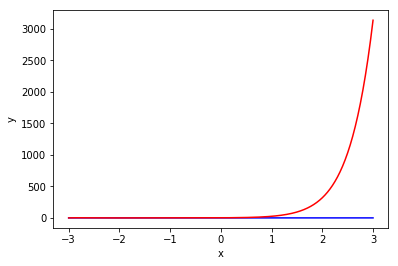

In [55]:
# plotting, Runge
t = np.arange(-3, 3.01, 0.01)
ps = [float(pn.subs(x,tt)) for tt in t]
plt.plot(t,f(t), 'b')
plt.plot(t, ps, 'r')
plt.xlabel('x')
plt.ylabel('y')

In [218]:
# Hermite Interpolation
def q(xs, i):
    return term_L(xs,i)**2
def h(xs, i):
    return q(xs,i)/q(xs,i).subs(x,xs[i])*(1 - (x-xs[i])*q(xs,i).diff(x).subs(x,xs[i])/q(xs,i).subs(x,xs[i]))
def g(xs, i):
    return q(xs,i)/q(xs,i).subs(x,xs[i])*(x-xs[i])
l = [0,1,2]
lv = [0,1,0]
lp = [1,0,-1]

In [213]:
q(l,2).diff(x).subs(x,2)

12

In [215]:
h(l,1)

x**2*(x - 2)**2

In [216]:
h(l,2)

x**2*(7 - 3*x)*(x - 1)**2/4

In [198]:
h(l,2)

x**2*(7 - 3*x)*(x - 1)**2/4

In [199]:
g(l,0)

x*(x - 2)**2*(x - 1)**2/4

In [200]:
g(l,1)

x**2*(x - 2)**2*(x - 1)

In [201]:
g(l,2)

x**2*(x - 2)*(x - 1)**2/4

In [220]:
p = 0
for i in range(3):
    p += h(l,i)*lv[i] + g(l,i)*lp[i]
p

x**2*(x - 2)**2 - x**2*(x - 2)*(x - 1)**2/4 + x*(x - 2)**2*(x - 1)**2/4